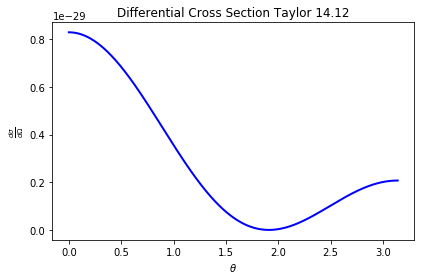

In [12]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt

def CrossSection12(theta_pts):
    c = 5.18*10**(-31)
    return c*( 1. + 6.*np.cos(theta_pts)+9.*(np.cos(theta_pts)**2) )

x_min = 0.
x_max = np.pi
delta_x = 0.01
theta_pts = np.arange(x_min, x_max, delta_x)


fig = plt.figure(figsize=(6,4))
ax = fig.add_subplot(1,1,1)
ax.set_xlabel(r'$\theta$')
ax.set_ylabel(r'$\frac{d \sigma}{d \Omega}$')
ax.set_title('Differential Cross Section Taylor 14.12')

line, = ax.plot(theta_pts, 
                CrossSection12(theta_pts), 
                color='blue', lw=2)

fig.tight_layout()
fig.savefig('Taylor_Problem_14p12p1.png', 
                   bbox_inches='tight')  

D:\Programs\Anaconda\lib\site-packages\ipykernel_launcher.py:14: RuntimeWarning: invalid value encountered in arcsin
  
D:\Programs\Anaconda\lib\site-packages\ipykernel_launcher.py:15: RuntimeWarning: invalid value encountered in sqrt
  from ipykernel import kernelapp as app


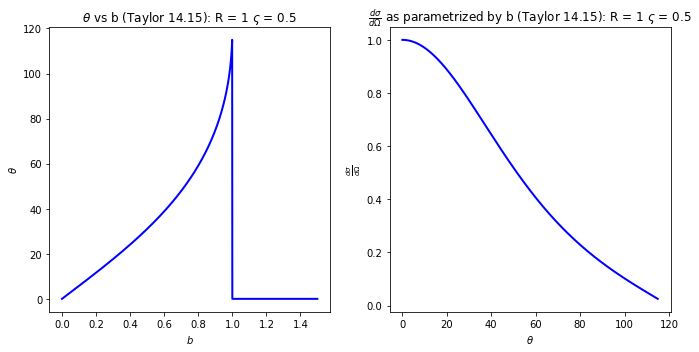

In [36]:
def ThetavB(b_pts, c, R):
    theta_pts = np.zeros(b_pts.shape)
    for i, b in enumerate(b_pts):
        if b < 1:
            theta_pts[i]= 2*( np.arcsin(b_pts[i]/R) - np.arcsin(c*b_pts[i] / R) )
        if b >1:
            theta_pts[i]= 0
    return theta_pts

def dSigdOmeg(b_pts):
    c=0.5
    R=1.
    
    theta_pts = 2*( np.arcsin(b_pts/R) - np.arcsin(c*b_pts / R) )
    alpha = 1/np.sqrt(1 - (b_pts/R)**2)
    beta = c/np.sqrt(1 - (b_pts*c /R)**2)
    
    ans = b_pts/np.sin(theta_pts)
    ans *= np.abs( R/(2*alpha-2*beta) )
    
    return theta_pts, ans

b_min = 0.000001
b_max = 1.5
delta_b = 0.001
b_pts = np.arange(b_min, b_max, delta_b)


fig = plt.figure(figsize=(10, 5))

ax1 = fig.add_subplot(1,2,2)
ax1.set_xlabel(r'$\theta$')
ax1.set_ylabel(r'$\frac{d \sigma}{d \Omega}$')
ax1.set_title(r'$\frac{d \sigma}{d \Omega}$ as parametrized by b (Taylor 14.15): R = 1 $\varsigma$ = 0.5')

theta_pts1, dSig_pts = dSigdOmeg(b_pts)
ax1.plot(theta_pts1*180./np.pi, dSig_pts,
                color='blue', lw=2)

ax2 = fig.add_subplot(1,2,1)
ax2.set_xlabel(r'$b$')
ax2.set_ylabel(r'$\theta$')
ax2.set_title(r'$\theta$ vs b (Taylor 14.15): R = 1 $\varsigma$ = 0.5')
theta_pts2 = ThetavB(b_pts, 0.5, 1.)
ax2.plot(b_pts, theta_pts2*180./np.pi,
                color='blue', lw=2)

fig.tight_layout()
fig.savefig('Taylor_Problem_14p15.png', 
                   bbox_inches='tight')  





In [35]:
import scipy.integrate as integrate

result = integrate.quad(lambda x: dSigdOmeg(x)[1], 0, 1)
print(result)

(0.5, 5.551115123125783e-15)
(0.6904599300866825, 1.167508201227463e-09)


0.499901093288472


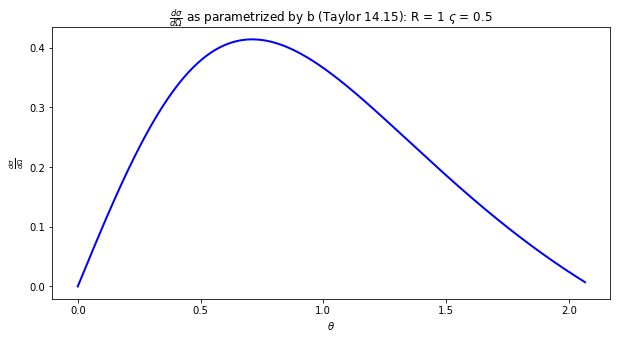

In [44]:
b_min = 0.000001
b_max = 1.
delta_b = 0.0001
b_pts = np.arange(b_min, b_max, delta_b)

theta_pts2, dSig_pts2 = dSigdOmeg(b_pts)

dSig_pts2 = dSig_pts2*np.sin(theta_pts2)

fig = plt.figure(figsize=(10, 5))

ax1 = fig.add_subplot(1,1,1)
ax1.set_xlabel(r'$\theta$')
ax1.set_ylabel(r'$\frac{d \sigma}{d \Omega}$')
ax1.set_title(r'$\frac{d \sigma}{d \Omega}$ as parametrized by b (Taylor 14.15): R = 1 $\varsigma$ = 0.5')

ax1.plot(theta_pts2, dSig_pts2,
                color='blue', lw=2)

result = np.trapz(dSig_pts2,x=theta_pts2)
print(result)

0.8999238894248996


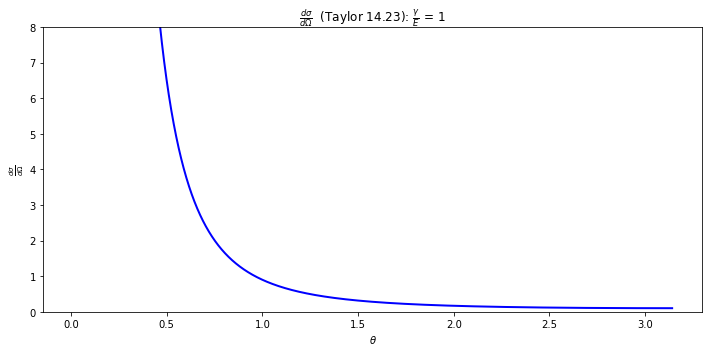

In [58]:
def dSigdOmeg2(theta_pts):
    
    ans = (np.pi**2) *(np.pi - theta_pts)
    ans /= (theta_pts**2) *((2.*np.pi-theta_pts)**2) *np.sin(theta_pts) 
    return ans

theta_min = 0.01
theta_max = np.pi
delta_theta = 0.001
theta_pts = np.arange(theta_min, theta_max, delta_theta)

print(dSigdOmeg2(1))

fig = plt.figure(figsize=(10, 5))

ax1 = fig.add_subplot(1,1,1)
ax1.set_xlabel(r'$\theta$')
ax1.set_ylabel(r'$\frac{d \sigma}{d \Omega}$')
ax1.set_title(r'$\frac{d \sigma}{d \Omega}$  (Taylor 14.23): $\frac{\gamma}{E}$ = 1')
ax1.set_ylim(0, 8)

ax1.plot(theta_pts, dSigdOmeg2(theta_pts),
                color='blue', lw=2)

fig.tight_layout()
fig.savefig('Taylor_Problem_14p23.png', 
                   bbox_inches='tight')  